In [107]:
%matplotlib inline
import numpy as np
import pandas as pd
from cycler import cycler
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_score

import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score, confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, roc_curve, plot_roc_curve
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error

In [126]:
df = pd.read_csv('piter_filtered.csv')


In [127]:
y = df['Price']
del df['Price']
del df['City']
del df['Area']
s=pd.Series(df['Material'])
Material=pd.get_dummies(s)
s1=pd.Series(df['Toilet type'])
ToiletType=pd.get_dummies(s1)
df = pd.DataFrame({'Live area': df['Live area'], 'Kitchen': df['Kitchen'], 'Total area': df['Total area'], })
df.join(ToiletType)
df.join(Material)

,Live area,Kitchen,Total area,1.090.1,121,137,504,504Д,600,600.11,...,М/ПН,МАН,НБЛ,НЕМ,ПН,РЕК,СТ,СФ,СФК,ХР
0,19.3,3.0,28.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,18.5,4.0,27.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,26.0,9.0,42.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.9,9.0,31.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.7,5.0,29.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6207,140.0,20.0,250.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6208,177.0,16.4,245.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6209,270.0,24.0,310.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6210,185.0,0.0,305.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [112]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [84]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso.coef_

array([1.12184519e+00, 1.40891251e+00, 4.65007156e-04])

In [85]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
lasso.coef_

array([1.11886046e+00, 1.15322878e+00, 5.17335568e-04])

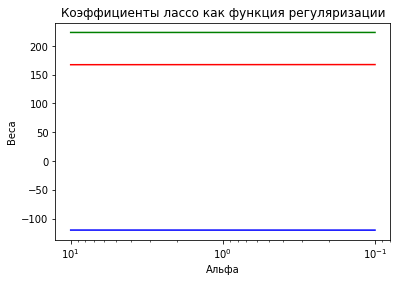

In [113]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("Альфа")
plt.ylabel("Веса")
plt.title("Коэффициенты лассо как функция регуляризации")
plt.axis("tight")
plt.show();

In [87]:
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=17)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17

In [88]:
lasso_cv.coef_

array([1.12184519e+00, 1.40891251e+00, 4.65007156e-04])

In [89]:
lasso_cv.alpha_

0.1

In [90]:
cross_val_score(Lasso(lasso_cv.alpha_), X_train, y_train, cv=3, scoring="neg_mean_squared_error")

array([-430.20327604, -576.12819729, -151.98540514])

In [91]:
abs(
    np.mean(
        cross_val_score(
            Lasso(lasso_cv.alpha_), X_train, y_train, cv=3, scoring="neg_mean_squared_error"
        )
    )
)

386.10562615747295

In [92]:
abs(np.mean(cross_val_score(Lasso(9.95), X_train, y_train, cv=3, scoring="neg_mean_squared_error")))

411.1515425109642

In [93]:
lasso_cv.alphas[:10]  # значения параметров на входе

array([0.1       , 0.14974874, 0.19949749, 0.24924623, 0.29899497,
       0.34874372, 0.39849246, 0.44824121, 0.49798995, 0.54773869])

In [94]:
lasso_cv.alphas_[:10]  # преобразованные значения параметров

array([10.        ,  9.95025126,  9.90050251,  9.85075377,  9.80100503,
        9.75125628,  9.70150754,  9.65175879,  9.60201005,  9.55226131])

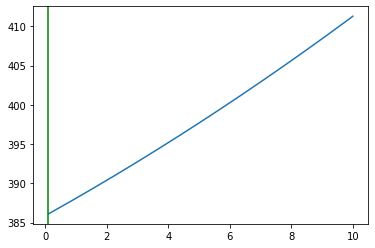

In [114]:
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(1))  # верно
plt.axvline(lasso_cv.alpha_, c="g");

RIDGE

In [97]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [115]:
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=3)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [99]:
ridge_cv.alpha_

0.01

In [100]:
ridge_cv.coef_

array([1.12187353e+00, 1.41150870e+00, 4.64476996e-04])

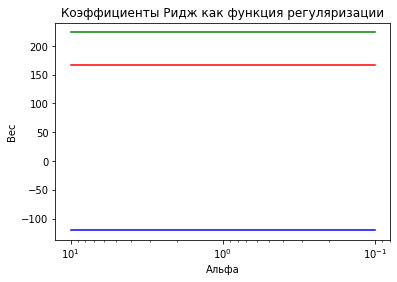

In [116]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("Альфа")
plt.ylabel("Вес")
plt.title("Коэффициенты Ридж как функция регуляризации")
plt.axis("tight")
plt.show()

In [123]:
model = LinearRegression()
model.fit(X_train, y_train)
r2_score(model.predict(X_test), y_test)

0.3938769481940988

In [124]:
mean_squared_error(model.predict(X_test), y_test)

22285634.43360513

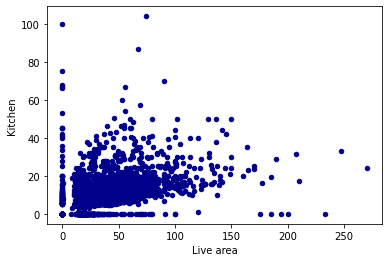

In [125]:
ax1 = df.plot.scatter(x='Live area', y='Kitchen', c='DarkBlue')